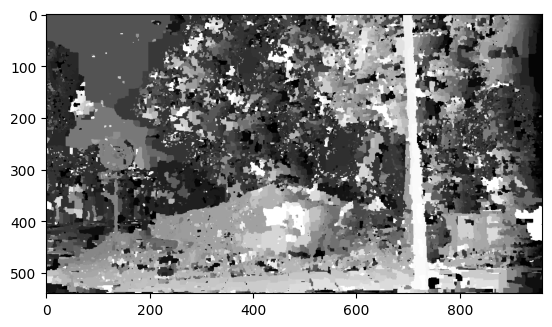

In [2]:
import gco
import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings

#read txt method one
Camera_prem = np.loadtxt("./cameras.txt")
camera_mat = Camera_prem.T
K1=camera_mat[:,0:3].T
R1=camera_mat[:,3:6].T
t1=camera_mat[:,6]
K2=camera_mat[:,7:10].T
R2=camera_mat[:,10:13].T
t2=camera_mat[:,13]

# load image
img1 = cv2.imread('test00.jpg')
img2 = cv2.imread('test09.jpg')
[H, W] = img1.shape[0:2]
# select image order
imgR = img1
imgL = img2
# imgR: in which objects are on the right in general.
# imgL: in which objects are on the left in general.
Lambda = 0.2
no_disparity = 50
# set disparity range: disparity = d_min:d_max
disparity = np.linspace(0, 0.0085, no_disparity)#list(range(0,no_disparity, 0.0085))
no_disparity = 50
# set disparity range: disparity = d_min:d_max
D = np.zeros([1, 50])
D[0,:] = np.linspace(0, 0.0085, no_disparity)  #list(range(0,no_disparity, 0.0085))
C = no_disparity
unary = np.zeros([H, W, no_disparity])
[X, Y] = np.meshgrid(disparity,disparity)
figure = 0

for w in range(W):
    for h in range(H):

        n1 = (w-1)*H + h
        node1 = imgR[h,w,:].reshape([1,3])
        x1 = [w, h, 1]
        temp = np.zeros([3,1])
        temp[:,0] =  np.dot(np.dot(K2,R2.T) , (t1-t2))
        temp2 = np.dot(temp, D)
        front_tmp = np.dot(K2, R2.T)
        front_tmp2 = np.dot(np.dot(front_tmp,  np.dot(np.linalg.inv(K1),R1)), x1)
        front_tmp3 = np.zeros([front_tmp2.shape[0],1])
        front_tmp3[:,0] = front_tmp2
        x2 = front_tmp3 + temp2

        x2_h = np.zeros([3, x2[2,:].shape[0]])
        x2_h[0,:] = x2[2,:].reshape(1, x2[2,:].shape[0])
        x2_h[1,:] = x2[2,:]
        x2_h[2,:] = x2[2,:]
        
        #x2_h = repmat(x2(3,:),3,1)
        x2 = np.round(np.divide(x2, x2_h))
        x2[0, x2[0,:]<0 ] = 0
        x2[0, x2[0,:]>W-1] = 0
        x2[1, x2[1,:]<0 ] = 0
        x2[1, x2[1,:]>H-1] = 0
        #n2 = (x2[0,:]-1)*H + x2[1,:]
        #n2_ls  = n2(n2<=518400 & n2>=1)
        for i in range(no_disparity):
            node2s = imgL[int(x2[1,i]), int(x2[0,i]),:]
            #node2s = img_seq2(n2_ls,:)
            match_cost = np.sqrt(sum((node1 - node2s)^2,2))
            unary[h,w,i] = sum(match_cost)
            #unary(n2<=518400 & n2>=1,n1) = match_cost

<font face = "Time New Roman" size = 5> The overall effect is good except for the color blocks in the result

0
1
2
3
4


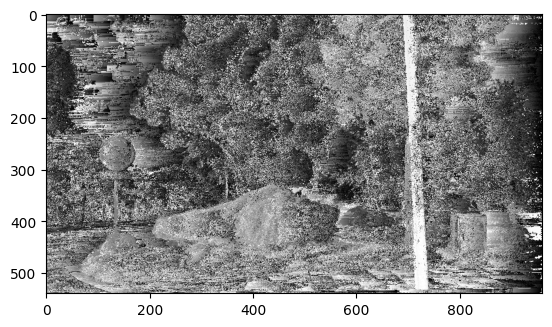

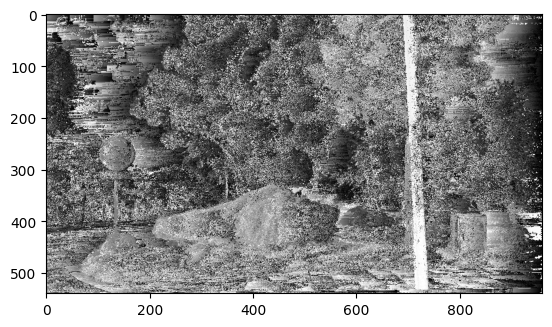

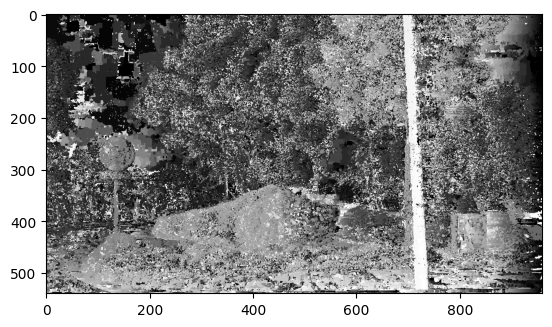

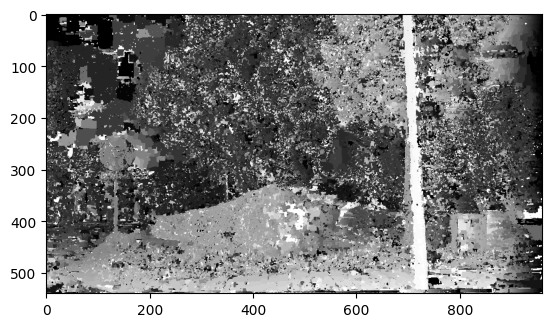

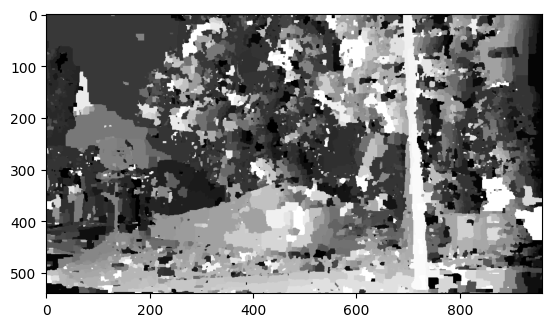

In [6]:
i = 0
for Lambda in(0.004, 0.007, 0.01, 0.02, 0.07):
    smooth = (1 - np.eye(no_disparity)) * Lambda
    labels = gco.cut_grid_graph_simple(unary/255, smooth, n_iter=-1)
    new_image = np.reshape(labels, [H,W]).astype(int)
    plt.figure(i)
    plt.imshow(new_image.astype(int),cmap='gray')
    i = i + 1

<font face = "Time New Roman" size = 5>There are more details when lambda is small, the depth becomes smooth too. But the color block can't be removed by change the parameters. I thinks it needs different weight on prior term. In this way the result could be enhanced.

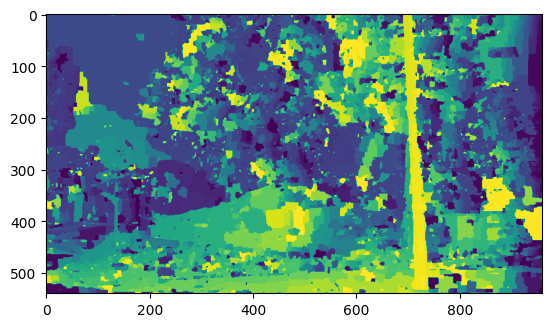

In [22]:
smooth = (1 - np.eye(no_disparity)) *0.07
labels = gco.cut_grid_graph_simple(unary/255, smooth, n_iter=-1)
new_image = np.reshape(labels, [H,W]).astype(int)


plt.figure(1)
plt.imshow(new_image.astype(int))

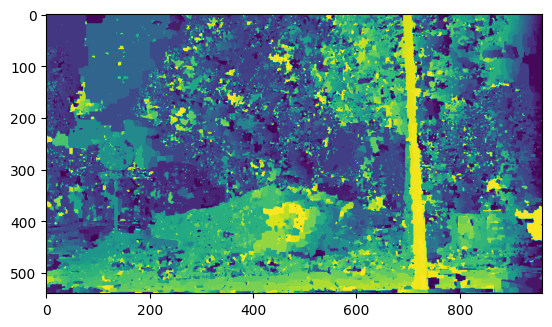

In [17]:
smooth = (1 - np.eye(no_disparity)) *0.04
new_image = np.reshape(labels, [H,W]).astype(int)
plt.figure(1)
plt.imshow(new_image.astype(int))